# Circle Loss 異常検知の設定で実験
- MNISTの一部のクラスを学習データから削除する (2,3を除いてみる) 
- [github](https://github.com/TinyZeaMays/CircleLoss/blob/master/mnist_example.py)のLossを使う
- ネットワークは本当に簡単なものを使用
- 分類モデルはロジスティックとlightgbm
- 評価指標はaccuracy, macro平均のprecision, confusion matrixの可視化

In [1]:
import sys
sys.path.append("../src")
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim.lr_scheduler as lr_scheduler
from torch import optim
from torch.utils.data import TensorDataset, DataLoader
 
from circle_loss import convert_label_to_similarity, CircleLoss
from classification import create_classification_dataset, plot_confusion_matrix, lr, lightgbm
from mnist import get_mnist_loader
from nn_model import Model, train
from visualize import create_embedding, visualize

In [2]:
use_cuda = torch.cuda.is_available() and True
device = torch.device("cuda" if use_cuda else "cpu")

MNISTのデータ読み込み

In [3]:
X_train = np.load('../data/MNIST_anomaly/train/data.npy')
y_train = np.load('../data/MNIST_anomaly/train/label.npy')
X_test = np.load('../data/MNIST_anomaly/test/data.npy')
y_test = np.load('../data/MNIST_anomaly/test/label.npy')

In [4]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 1, 28, 28)
(60000,)
(10000, 1, 28, 28)
(10000,)


一部を削除

In [5]:
X_train = X_train[np.where(y_train != 2)[0]]
y_train = y_train[np.where(y_train != 2)[0]]
X_train = X_train[np.where(y_train != 3)[0]]
y_train = y_train[np.where(y_train != 3)[0]]
X_train = X_train[np.where(y_train != 0)[0]]
y_train = y_train[np.where(y_train != 0)[0]]
X_train = X_train[np.where(y_train != 7)[0]]
y_train = y_train[np.where(y_train != 7)[0]]
print(X_train.shape)
print(y_train.shape)

(35786, 1, 28, 28)
(35786,)


pytorchのTensorに変換

In [6]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

pytorchのDataSet化

In [7]:
trainset = TensorDataset(X_train, y_train)
testset = TensorDataset(X_test, y_test)

In [8]:
train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
val_loader = DataLoader(testset, batch_size=1, shuffle=True)

In [9]:
# model
model = Model().to(device)
# model_path = "../model/mnist_anomaly/model.pth"
# model.load_state_dict(torch.load(model_path)) 

# optimzer
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9, weight_decay=1e-5)
sheduler = lr_scheduler.StepLR(optimizer, 20, gamma=0.8)
 
# CircleLoss
criterion = CircleLoss(m=0.25, gamma=80).to(device)
 
# Training
for epoch in range(20):
    sheduler.step()
    train(model, criterion, optimizer, epoch+1, train_loader, device)

/Users/kenta_suzuki/opt/miniconda3/envs/pytorch36/lib/python3.6/site-packages/torch/optim/lr_scheduler.py:123: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)
  1%|▏         | 7/560 [00:00<00:08, 64.62it/s]

Training... Epoch = 1


  2%|▏         | 9/560 [00:00<00:06, 86.28it/s]

Training... Epoch = 2


  2%|▏         | 9/560 [00:00<00:06, 82.81it/s]

Training... Epoch = 3


  1%|▏         | 8/560 [00:00<00:07, 77.84it/s]

Training... Epoch = 4


  1%|▏         | 7/560 [00:00<00:08, 67.78it/s]

Training... Epoch = 5


  1%|▏         | 8/560 [00:00<00:07, 78.28it/s]

Training... Epoch = 6


  1%|▏         | 8/560 [00:00<00:07, 78.43it/s]

Training... Epoch = 7


  1%|▏         | 8/560 [00:00<00:07, 78.61it/s]

Training... Epoch = 8


  1%|▏         | 8/560 [00:00<00:07, 73.76it/s]

Training... Epoch = 9


  1%|▏         | 8/560 [00:00<00:07, 75.39it/s]

Training... Epoch = 10


  1%|▏         | 8/560 [00:00<00:07, 74.21it/s]

Training... Epoch = 11


  1%|▏         | 8/560 [00:00<00:07, 77.82it/s]

Training... Epoch = 12


  1%|▏         | 8/560 [00:00<00:07, 74.58it/s]

Training... Epoch = 13


  1%|▏         | 8/560 [00:00<00:07, 74.10it/s]

Training... Epoch = 14


  1%|▏         | 8/560 [00:00<00:07, 75.87it/s]

Training... Epoch = 15


  1%|▏         | 8/560 [00:00<00:07, 77.92it/s]

Training... Epoch = 16


  1%|▏         | 8/560 [00:00<00:07, 77.19it/s]

Training... Epoch = 17


  1%|▏         | 8/560 [00:00<00:07, 76.77it/s]

Training... Epoch = 18


  1%|▏         | 8/560 [00:00<00:07, 76.17it/s]

Training... Epoch = 19


  1%|▏         | 8/560 [00:00<00:06, 79.79it/s]

Training... Epoch = 20


100%|██████████| 560/560 [00:07<00:00, 79.72it/s]


In [10]:
model_path = "../model/mnist_anomaly/model.pth"
torch.save(model.to('cpu').state_dict(), model_path)

分類モデルに投入するためのデータセット作成

In [11]:
X_train = np.load('../data/MNIST_anomaly/train/data.npy')
y_train = np.load('../data/MNIST_anomaly/train/label.npy')
X_test = np.load('../data/MNIST_anomaly/test/data.npy')
y_test = np.load('../data/MNIST_anomaly/test/label.npy')

In [12]:
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)
X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

In [13]:
trainset = TensorDataset(X_train, y_train)
testset = TensorDataset(X_test, y_test)

train_loader = DataLoader(trainset, batch_size=64, shuffle=True)
val_loader = DataLoader(testset, batch_size=1, shuffle=True)

In [14]:
train_x, train_y = create_classification_dataset(train_loader, model, device)
valid_x, valid_y = create_classification_dataset(val_loader, model, device)

100%|██████████| 10000/10000 [00:04<00:00, 2224.50it/s]


In [15]:
train_y = train_y.astype('int')
valid_y = valid_y.astype('int')

埋め込みの可視化 (0, 2, 3, 7のクラスは学習できていない)
- もっと散らばるかと思ったが想定以上に固まってる

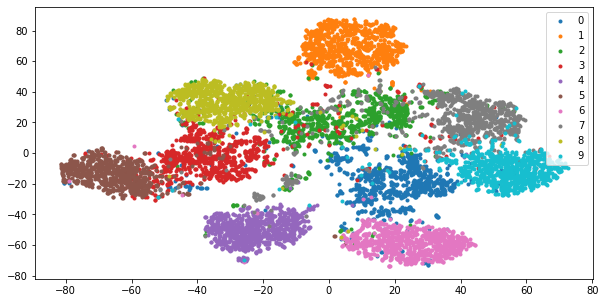

In [16]:
embedding = create_embedding(valid_x, n_components=2, init='pca', random_state=501, metric='cosine')
visualize(embedding, valid_y, 10)

/Users/kenta_suzuki/opt/miniconda3/envs/pytorch36/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


train acc:  0.9418666666666666
valid acc:  0.9376
macro mean precision:  0.937631393092895
macro mean recall:  0.9382763363801608


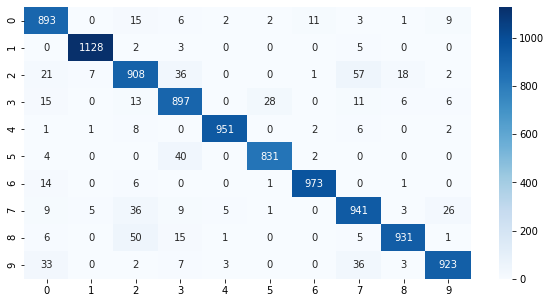

In [17]:
clf = lr(train_x, train_y, valid_x, valid_y)

train acc:  0.9891666666666666
valid acc:  0.9583
macro mean precision:  0.9586136207948985
macro mean recall:  0.9584458834106908


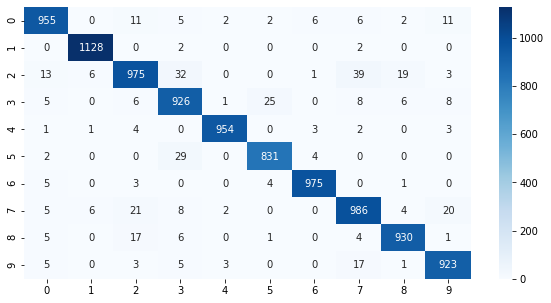

In [18]:
gbm = lightgbm(train_x, train_y, valid_x, valid_y)